## Generative models


We will only talk about 

## What is generative models? 

## What is a distribution!

Before we talk about generative models we need to talk about data.

And in specific we need to talk about distributions. 

### Q: What is the distribution we are working with?

### A: Sequenced blood samples from all human beings

### Q: What are the variables/parameters for this distribution?

### A: Age, Gender, Cancer status, Time of day, Hospital, Nurse, Sequencer, Sample deterioration, etc. etc. etc.

Say that we wanted to model this distribution. Then that's not easy, since the data distribution looks very complicated! But we can try

In generative models we speak of the distribution as p(x). Sometimes you want to condition the distribution to a specific subset, like p(x|z), with z being something like gender==male. 

Note! Generative models do not work with targets. This is a fundamentally different problem.  



#### Say that we have some data...





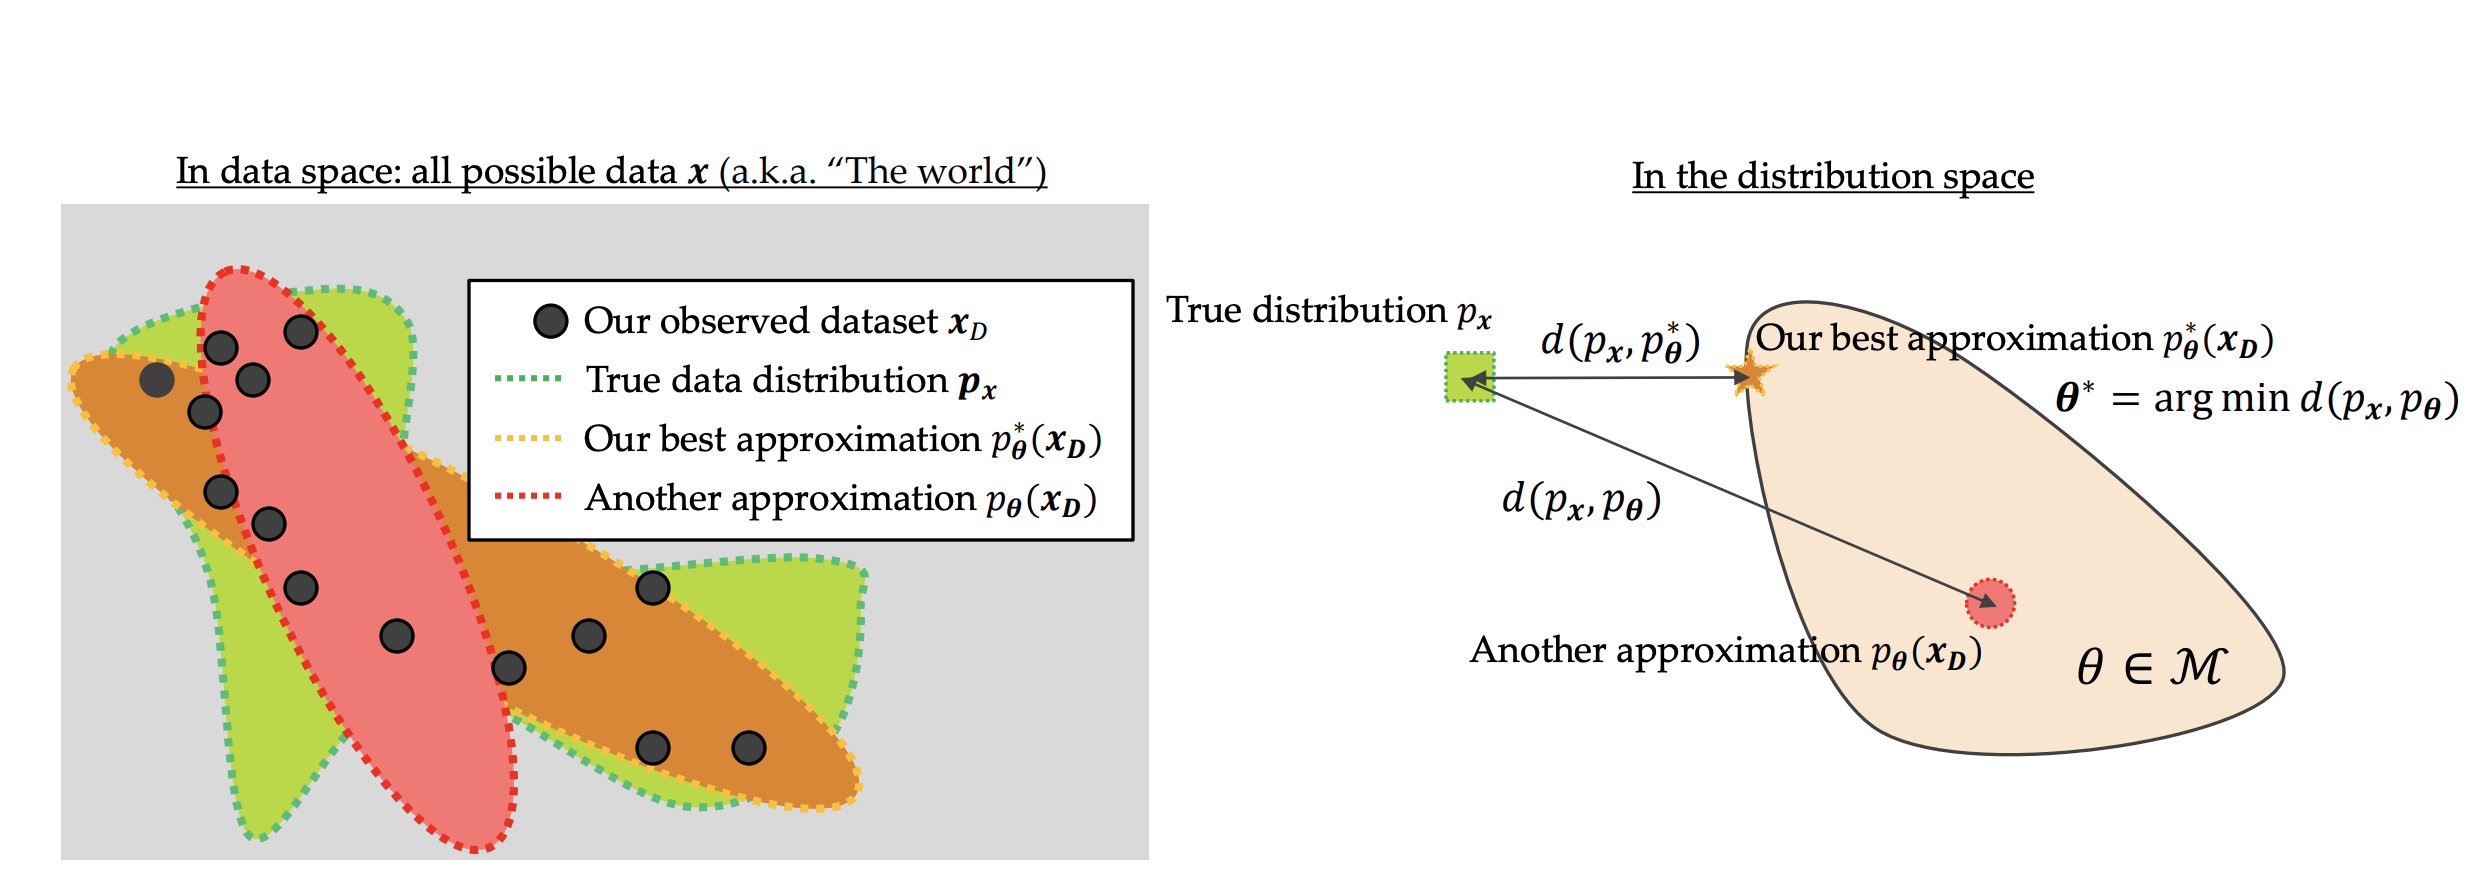

## Why is generative models?

Uncertainty calculation

Calculate the probability of data (Outlier Rejection)

Simulated Data generation




But generative models are often used for other reasons

Feature learning

VAE (feature learning)




and latent variable stuff

In [ ]:
Demo GAN

#### Demo VAE

The big takeaway is to understand the difference between Variational auto encoders and Autoencoders.

An autoencoder is a supression tool. It encodes/compresses to a lower dimension and outputs the same data. The process is deterministic. A variational autoencoder introduces smoothness through its generative properties. The lower dimension is called a latent distribution which is modelled on the data distribution.



### SCVI tools

Single cell variational inference


Single cell research BUT! They are fully integrated with anndata so it is actually quite useful.

The goal is to remove unwanted variance (batch effect) while retaining relevant variance (cell type)

Let's take a look at how their models operate!